### finance project

In [41]:
from pandas_datareader import data
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [42]:
start = '2006-01-01'
end = '2016-01-01'

In [43]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = yf.download(tickers, start=start, end=end, group_by='ticker')

[*********************100%%**********************]  6 of 6 completed


In [44]:
bank_stocks

Ticker            JPM                                                        \
Price            Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  39.830002  40.360001  39.299999  40.189999  24.366911  12838600   
2006-01-04  39.779999  40.139999  39.419998  39.619999  24.226284  13491500   
2006-01-05  39.610001  39.810001  39.500000  39.740002  24.299648   8109400   
2006-01-06  39.919998  40.240002  39.549999  40.020000  24.470865   7966900   
2006-01-09  39.880001  40.720001  39.880001  40.669998  24.868322  16575200   
...               ...        ...        ...        ...        ...       ...   
2015-12-24  66.620003  66.889999  66.320000  66.599998  51.892147   4468200   
2015-12-28  66.290001  66.449997  65.709999  66.379997  51.720718   6610600   
2015-12-29  66.839996  67.300003  66.739998  67.070000  52.258350   9820800   
2015-12-30  67.040001  67.050003  66.449997  66.589996  51.884350   7190700   
2015-12-31  66.190002  66.779999  66.000000  66.029999  51.448025  14654300   

Ticker            WFC                                   ...          GS  \
Price            Open       High        Low      Close  ...         Low   
Date                                                    ...               
2006-01-03  31.600000  31.975000  31.195000  31.900000  ...  124.230003   
2006-01-04  31.799999  31.820000  31.365000  31.530001  ...  126.379997   
2006-01-05  31.500000  31.555000  31.309999  31.495001  ...  125.610001   
2006-01-06  31.580000  31.775000  31.385000  31.680000  ...  127.290001   
2006-01-09  31.674999  31.825001  31.555000  31.674999  ...  128.000000   
...               ...        ...        ...        ...  ...         ...   
2015-12-24  54.970001  55.090000  54.709999  54.820000  ...  182.020004   
2015-12-28  54.549999  54.779999  54.169998  54.680000  ...  179.839996   
2015-12-29  55.110001  55.349998  54.990002  55.290001  ...  182.500000   
2015-12-30  55.270000  55.310001  54.790001  54.889999  ...  181.839996   
2015-12-31  54.509998  54.950001  54.220001  54.360001  ...  180.029999   

Ticker                                             BAC                        \
Price            Close   Adj Close   Volume       Open       High        Low   
Date                                                                           
2006-01-03  128.869995   95.765648  6188700  46.919998  47.180000  46.150002   
2006-01-04  127.089996   94.442886  4861600  47.000000  47.240002  46.450001   
2006-01-05  127.040001   94.405724  3717400  46.580002  46.830002  46.320000   
2006-01-06  128.839996   95.743347  4319600  46.799999  46.910000  46.349998   
2006-01-09  130.389999   96.895203  4723500  46.720001  46.970001  46.360001   
...                ...         ...      ...        ...        ...        ...   
2015-12-24  182.470001  151.741241  1107600  17.320000  17.379999  17.219999   
2015-12-28  181.619995  151.034363  1723300  17.219999  17.230000  16.980000   
2015-12-29  183.529999  152.622696  1848900  17.250000  17.350000  17.160000   
2015-12-30  182.009995  151.358704  1514300  17.200001  17.240000  17.040001   
2015-12-31  180.229996  149.878433  1773900  17.010000  17.070000  16.830000   

Ticker                                      
Price           Close  Adj Close    Volume  
Date                                        
2006-01-03  47.080002  31.370388  16296700  
2006-01-04  46.580002  31.037249  17757900  
2006-01-05  46.639999  31.077217  14970700  
2006-01-06  46.570000  31.030581  12599800  
2006-01-09  46.599998  31.050560  15619400  
...               ...        ...       ...  
2015-12-24  17.270000  14.192423  29369400  
2015-12-28  17.129999  14.077370  41777500  
2015-12-29  17.280001  14.200641  45670400  
2015-12-30  17.049999  14.011626  35066400  
2015-12-31  16.830000  13.830830  47153000  

[2517 rows x 36 columns]

what is the max Close price for each bank's stock throughout the time period?

In [45]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [46]:
bank_stocks.xs(key='Close',axis=1,level='Price').max()

Ticker
JPM     70.080002
WFC     58.520000
MS      89.300003
C      564.099976
GS     247.919998
BAC     54.900002
dtype: float64

create a new empty DataFrame called returns. this dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [47]:
returns = pd.DataFrame()

In [48]:
for tick in tickers:
    returns[tick+' return'] = bank_stocks[tick]['Close'].pct_change()

In [49]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


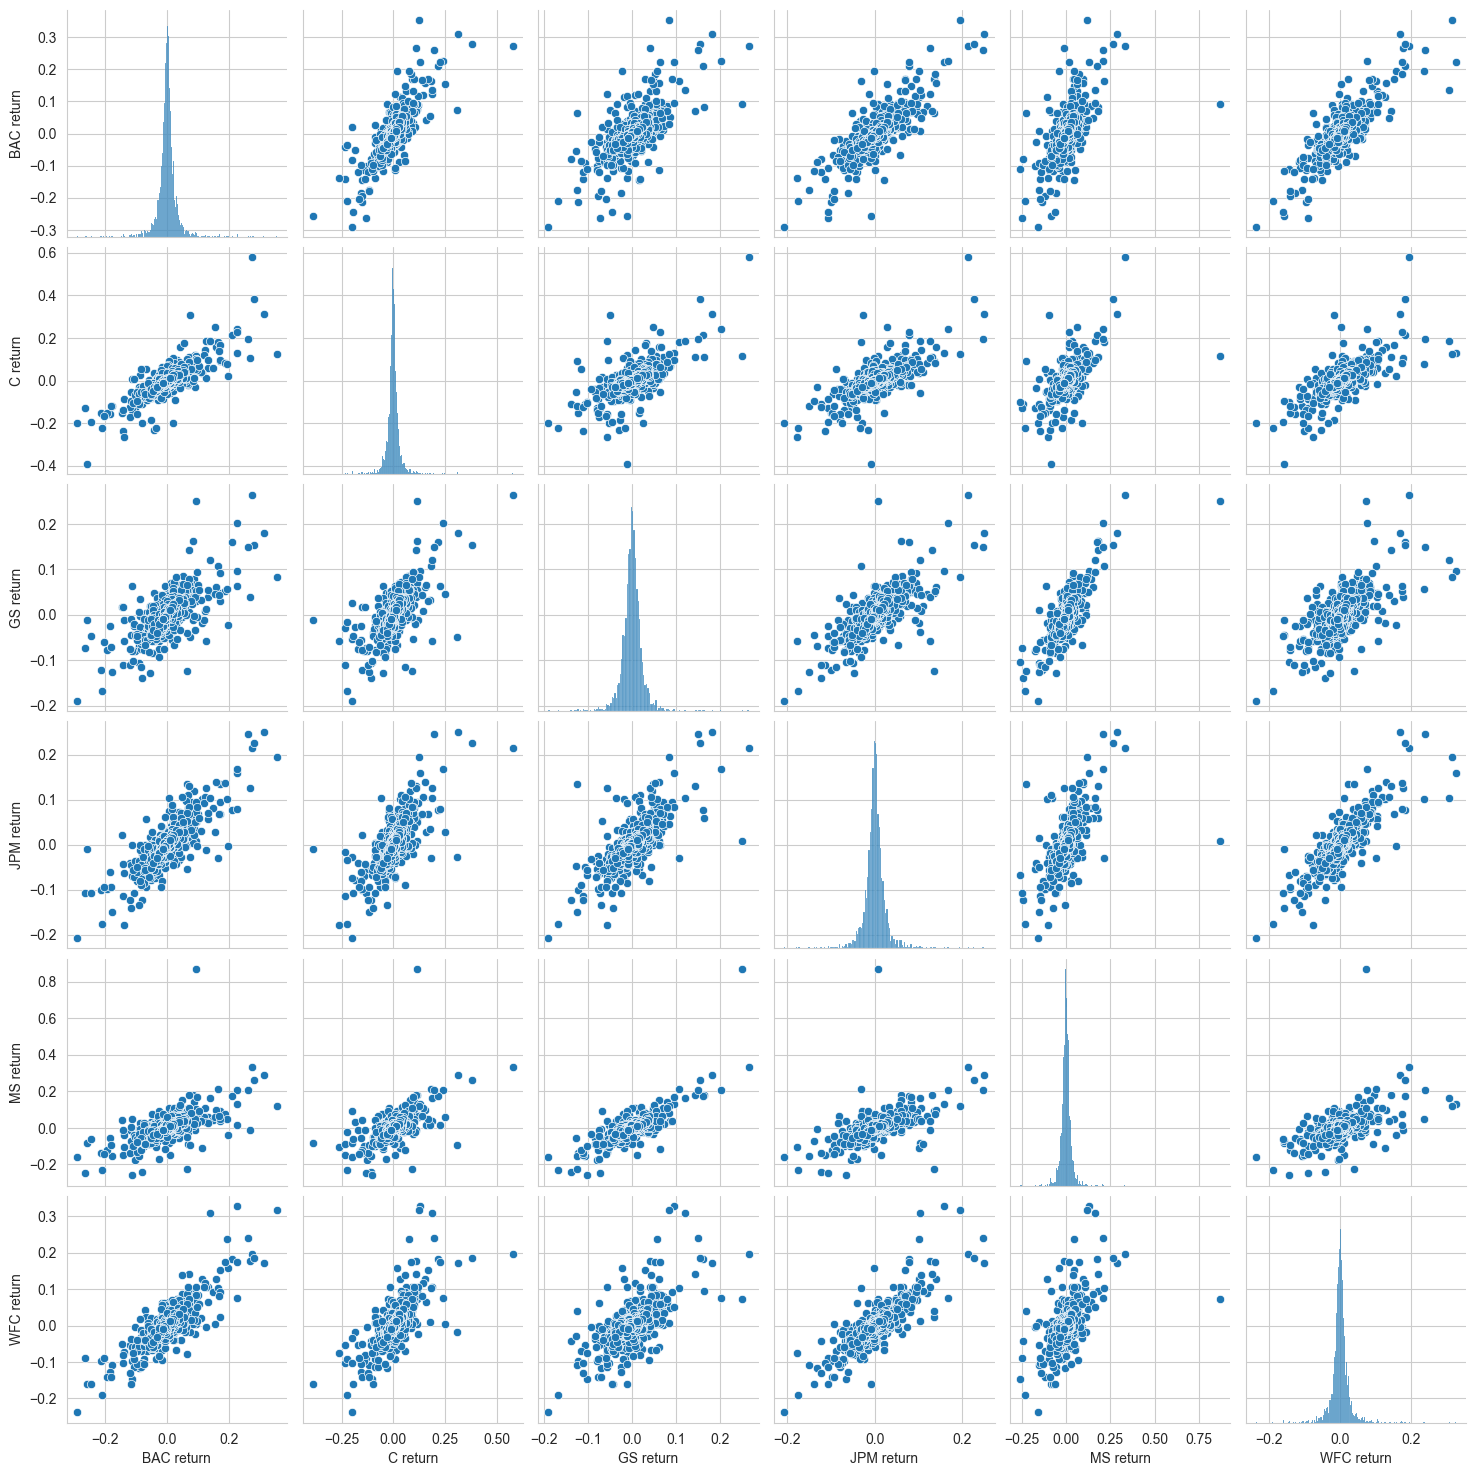

In [50]:
sns.pairplot(returns)

using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. you should notice that 4 of the banks share the same day for the worst drop.

In [51]:
returns.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [52]:
returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [53]:
returns.std()

BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

In [54]:
returns.loc['2015-01-01':'2015-12-31'].std

<bound method DataFrame.std of             BAC return  C return  GS return  JPM return  MS return  WFC return
Date                                                                          
2015-01-02    0.000559  0.002772   0.002992   -0.001438  -0.002320   -0.002189
2015-01-05   -0.029050 -0.031515  -0.031223   -0.031045  -0.031258   -0.027422
2015-01-06   -0.029919 -0.035205  -0.020229   -0.025929  -0.028800   -0.020865
2015-01-07    0.004745  0.009270   0.014903    0.001526   0.014278    0.005951
2015-01-08    0.020661  0.015048   0.015965    0.022346   0.014889    0.022137
...                ...       ...        ...         ...        ...         ...
2015-12-24   -0.004037  0.001520  -0.002624   -0.001948  -0.003681   -0.003997
2015-12-28   -0.008107 -0.006261  -0.004658   -0.003303  -0.009544   -0.002554
2015-12-29    0.008757  0.011455   0.010516    0.010395   0.011812    0.011156
2015-12-30   -0.013310 -0.012835  -0.008282   -0.007157  -0.009831   -0.007235
2015-12-31   -0.01290

create a distplot using seaborn of the 2015 returns for Morgan Stanley

<Axes: xlabel='MS return', ylabel='Count'>

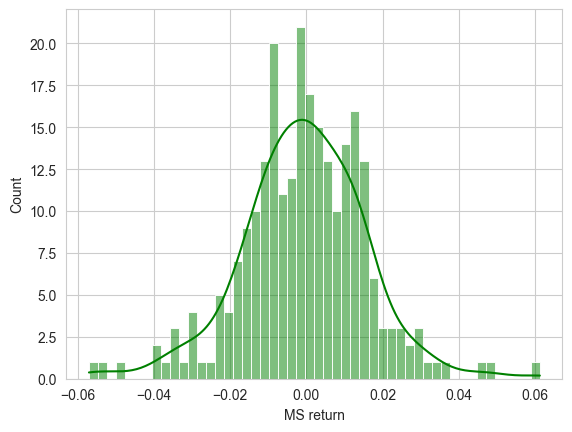

In [55]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS return'],color='green',bins=50,kde=True)

create a distplot using seaborn of the 2008 returns for CitiGroup

<Axes: xlabel='C return', ylabel='Count'>

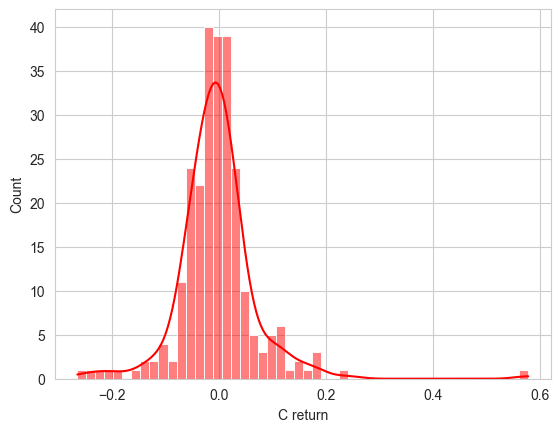

In [56]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C return'],color='red',bins=50,kde=True)

create a line plot showing Close price for each bank for the entire index of time

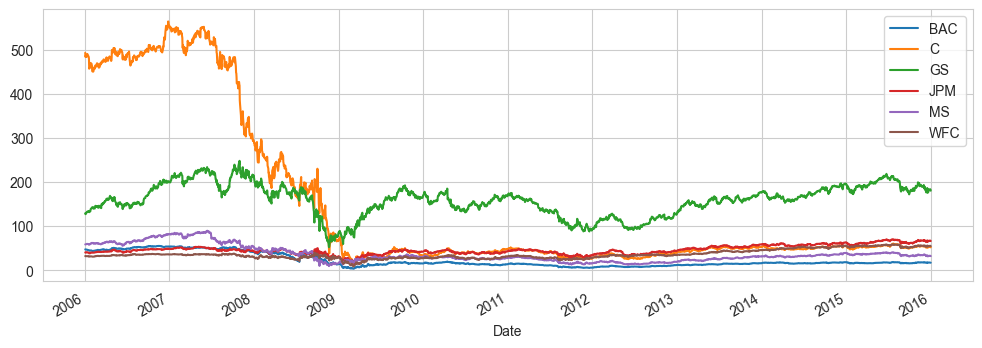

In [58]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

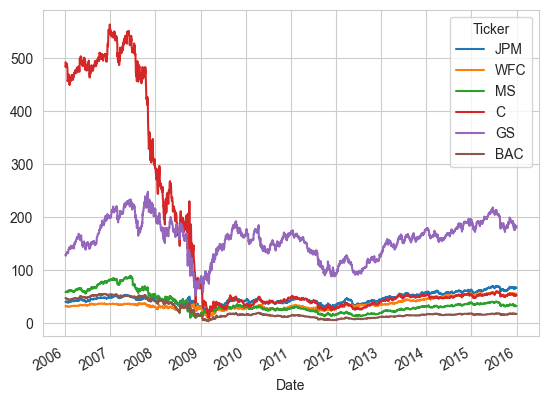

In [60]:
bank_stocks.xs(key='Close',axis=1,level='Price').plot()

In [66]:
bank_stocks.xs(key='Close',axis=1,level='Price').iplot()

create a heatmap of the correlation between the stocks Close Price

In [72]:
bank_stocks.xs(key='Close',axis=1,level='Price')

Ticker,JPM,WFC,MS,C,GS,BAC
Date,,,,,,
2006-01-03,40.189999,31.900000,58.310001,492.899994,128.869995,47.080002
2006-01-04,39.619999,31.530001,58.349998,483.799988,127.089996,46.580002
2006-01-05,39.740002,31.495001,58.509998,486.200012,127.040001,46.639999
2006-01-06,40.020000,31.680000,58.570000,486.200012,128.839996,46.570000
2006-01-09,40.669998,31.674999,59.189999,483.899994,130.389999,46.599998
...,...,...,...,...,...,...
2015-12-24,66.599998,54.820000,32.480000,52.709999,182.470001,17.270000
2015-12-28,66.379997,54.680000,32.169998,52.380001,181.619995,17.129999
2015-12-29,67.070000,55.290001,32.549999,52.980000,183.529999,17.280001


In [74]:
bank_stocks.xs(key='Close',axis=1,level='Price').corr()

Ticker,JPM,WFC,MS,C,GS,BAC
Ticker,,,,,,
JPM,1.000000,0.940269,0.250427,0.003515,0.685286,0.103874
WFC,0.940269,1.000000,0.131835,-0.068536,0.499897,0.008542
MS,0.250427,0.131835,1.000000,0.933609,0.683792,0.944218
C,0.003515,-0.068536,0.933609,1.000000,0.434123,0.971516
GS,0.685286,0.499897,0.683792,0.434123,1.000000,0.550898
BAC,0.103874,0.008542,0.944218,0.971516,0.550898,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

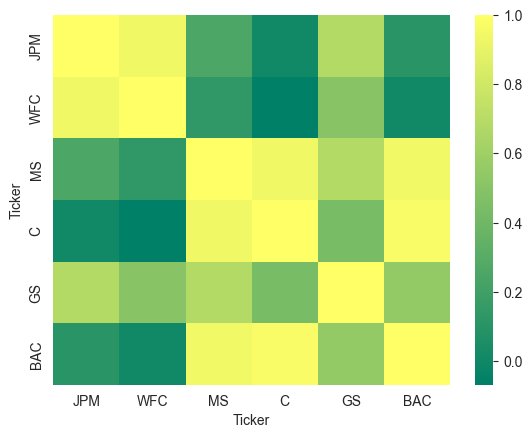

In [77]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Price').corr(),cmap='summer')

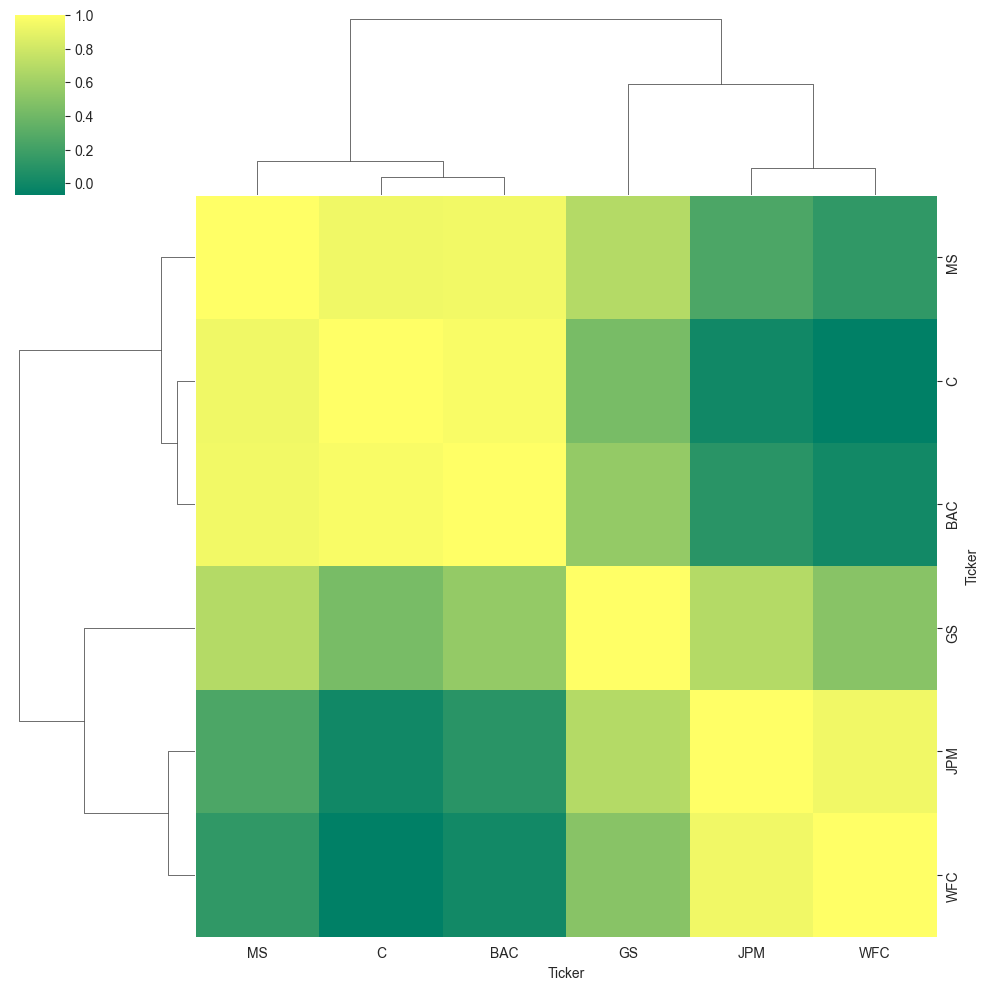

In [78]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Price').corr(),cmap='summer')